## Artificial Intelligence, Part II: Learning (continued)

Today we will continue the discussion on the learning part of the course. In this session we will review neural networks, support vector classifiers and kernel methods. The students who take the ML course can jump to exercise 3 below.    

### Exercise 1. Warm up with scikit learn

Using the function MLPClassifier from scikit_learn, learn a neural network on each of the dataset below.

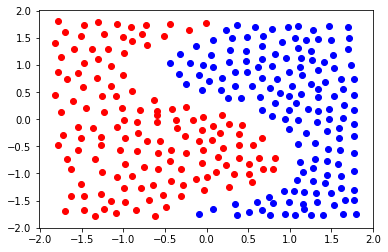

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

import scipy.io
class1 = scipy.io.loadmat('MLPdata1.mat')['MLPdata1']
class2 = scipy.io.loadmat('MLPdata2.mat')['MLPdata2']

plt.scatter(class1[:,0],class1[:,1], c='r')
plt.scatter(class2[:,0],class2[:,1], c='b')
plt.show()



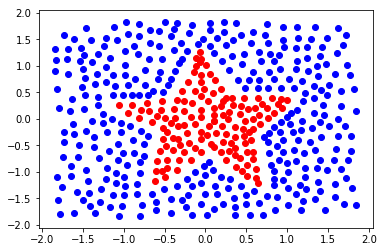

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

import scipy.io
class1b = scipy.io.loadmat('MLPdata1b.mat')['MLPdata1b']
class2b = scipy.io.loadmat('MLPdata2b.mat')['MLPdata2b']

plt.scatter(class1b[:,0],class1b[:,1], c='r')
plt.scatter(class2b[:,0],class2b[:,1], c='b')
plt.show()


### Exercise 2. Neural network from scratch. 

Just as we did for the logistic regression classifier, we can fit a neural network to a binary classification dataset by viewing the output of the network as a probability. For two classes $\mathcal{C}_0$ and $\mathcal{C}_1$, If the output of our neural network is defined as 

$$y(\mathbf{x}) = \sigma\left(\sum_{i=1}^{N_2} w_{i}^{(2)}\sigma\left(\sum_{j=1}^{N_1} w_{ij}^{(1)}x_j + w_{i0}^{(1)}\right) + w^{(2)}_{0}\right)$$

We can view $y(\mathbf{x})$ as the probability that a sample $\mathbf{x}_i$ belongs to $\mathcal{C}_1$. In other words, we view $y(\mathbf{x}_i)$ as $p(t = 1|\mathbf{x}_i)$. 

For a particular distribution of our data $\left\{\mathbf{x}^i, t^i\right\}$. Let $k_i=0$ or $1$ depending on what is observed in the dataset. We can then study the probability of all the the observed targets 

$$p(\left\{t^i = k_i\right\}_{i=1}^N|\left\{\mathbf{x}_i\right\}_{i=1}^N)$$

If we assume that those targets are independent and that each target $t^i$ only depends on the sample $\mathbf{x}^i$, this joint probability can read as 

\begin{align}
p(\left\{t^i = k\right\}_{i=1}^N|\mathcal{D}) &= \prod_{i=1}^N p(t^i=k_i|\mathbf{x}^{(i)})\\
& = \prod_{i=1}^N y(\mathbf{x}^{(i)})^{k}(1-y(\mathbf{x}^{(i)}))^{(1-k_i)}
\end{align}

From this, we can look for the parameters of the neural network that maximize this probability. Just as for logistic regression, we take the negative log which gives the log loss


\begin{align}
-\log(p(\left\{t^{(i)}\right\}_{i\in \mathcal{D}}|\mathbf{x})) = -\sum_{i=1}^N k_i\log(y(\mathbf{x}^i)) + (1-k_i)\log(1-y(\mathbf{x}^i))
\end{align}

We can then apply gradient descent on this model. 

#### Exercise 1.1. Forward propagation

As a first step, write a function that compute the forward propagation through the network for a random set of weights and bias. Take a network with a single hidden layer and take $\sigma$ to be the sigmoid activation.

In [ ]:
def NeuralNetwork(x, W):
    
    
    '''function should return the output to the network for ser of weights encoded in W'''
    
    
    
    return 


def Loss(data, target, W):
    
    
    '''function should return the value of the loss for a neural network with weights W'''
    
    
    
    return Lossvalue

#### Exercise 1.2. Learning

As a second exercise, we will train the network through gradient descent. We consider a stochastic gradient descent framework in which we minimize the loss with one sample at a time.
The gradient of a neural network is usually a difficult object to compute because of the multiple weights that define teh network. Nonetheless, it is possible to derive it efficiently through a procedure known as backpropagation. The idea is the following.

Let $a_i^{\ell}$ denote the input to each unit (in layer $\ell$) and $z_j^{\ell}$ denote the output to each unit at layer $\ell$. From this we have $z_i^{\ell} = \sigma(a_i^{\ell})$ and $a_i^{\ell} = \sum_{j} w_{ij}^{\ell} z_{j}^{\ell-1}$.


1 - Start by computing the gradient of the cross entropy loss with respect to $a_{\text{out}}$. Let us call this quantity $\delta_{\text{out}}$ (show that $\delta_{\text{out}} = t^{(i)} - y(\mathbf{x}^{(i)})$)
2 - Then For any weight we have 
$$\frac{\partial L}{\partial w_{ij}^{\ell}} = \frac{\partial L}{\partial a^{\ell}_j}\frac{\partial a_j^{\ell}}{\partial w_{ji}^{\ell}}, \quad (*)$$

If we use the notation $\delta_j^{\ell}= \frac{\partial L}{\partial a^{\ell}_j}$, we have 
$$\frac{\partial L}{\partial w_{ij}} = \delta_j^{\ell} z_{j}^{\ell-1}$$

That is, once we have the $\delta_j^{\ell}$, we have the derivatives. 

3 - To get the $\delta_j^{\ell}$ at all layers, we again turn to the chain rule. First note that $a_j^{\ell-1}$ appear in each of the $a_k^{\ell}$ (at the next layer). Using the chain rule, we have 

$$\delta_j^{\ell-1} = \frac{\partial L}{\partial a_j^{\ell-1}} = \sum_{k} \frac{\partial L}{\partial a_{k}^{\ell}} \frac{\partial a_k^{\ell}}{\partial a_j^{\ell-1}}$$

In this expression, we have $\frac{\partial a_k^{\ell}}{\partial a_j^{\ell-1}} = w_{kj}^{\ell}\sigma'(a_j^{\ell-1})$. From this, we can thus write 

$$\delta_j^{\ell-1} = \sigma'(a_j^{\ell-1})\sum_{k} w_{kj}^{\ell}\delta_k^{\ell}$$ 

In other words, once you have $\delta_{out}$, you can backpropagate it to generate all the $\delta_j^{\ell-1}$ at all previous layers $\ell$. 

The __backpropagation idea__ can be summarized as follows:


1- Apply an input vector $\mathbf{x}^i$ to the network and forward propagate this sample through the network to find all the inputs and outputs for all activations

2- Evaluate the $\delta_{\text{out}}$

3- Backpropagate the $\delta^{\ell}$ using the equations above to find all the $\delta^{\ell}_k$ for all layers
4- Use the equation $(*)$ above to compute the derivatives. 

Augment your function by returning the gradient of the network. Then use this gradient with a small learning rate to learn the weights of the network on the dataset below.

In [ ]:
def Loss(data, target, W):
    
    
    '''function should return the value of the loss for a neural network with weights W'''
    
    
    
    return Lossvalue, Lossgradient 


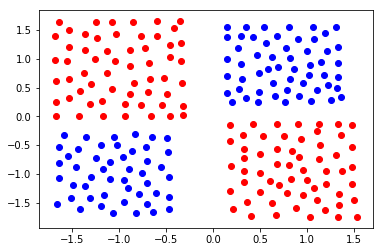

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.io
class1 = scipy.io.loadmat('NN_AIclass1.mat')['NN_AIclass1']
class2 = scipy.io.loadmat('NN_AIclass2.mat')['NN_AIclass2']

plt.scatter(class1[:,0],class1[:,1], c='r')
plt.scatter(class2[:,0],class2[:,1], c='b')
plt.show()



### Exercise 3. Maximal Margin classifier and non linearly separable data (10pts)

So far we have studided Maximal Margin classifier when the data was linearly separable. In this case, the plane will naturally position itself in between the two classes. The formulation in the linearly separable case is of the form

$$\max_{\mathbf{w}, b_0}\min_{i} \frac{y(\mathbf{x}^{(i)})t^{(i)}}{\|\mathbf{w}\|} = \max_{\mathbf{w}, b_0}\min_i \frac{(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)t^{(i)}}{\|\mathbf{w}\|}$$

This formulation is not very nice because the optimization variable appears at the denominator. Note that the formulation $(*)$ can be written as 

\begin{align}
\max_{\gamma, \mathbf{w}, b_0} & \quad \frac{\gamma}{\|\mathbf{w}\|} \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq \gamma 
\end{align}

Here we simply introduce the parameter $\gamma$ to represent the margin (smallest distance between any point from the dataset and the plane). An important thing to notice when looking at $(**)$ is that any solution for $\mathbf{w}, b_0, \gamma$ can generate an other solution with the same objective by simply scaling it with a positive weight $\alpha$. Indeed if $\mathbf{w},b_0, \gamma$ is an optimal solution to $(**)$, it is easy to check that $\alpha \mathbf{w}, \alpha \gamma, \alpha b_0$ will be a valid solution as well. Since we only need one solution, we can choose to optimize over the set of solution such that $\gamma = 1$. Concretely this means that for each 'line' of solution $(\alpha \gamma, \alpha b_0, \alpha \mathbf{w})$, we only retain the $\alpha$ corresponding to $\alpha\gamma = 1$. The problem then becomes

\begin{align}
\max_{\mathbf{w}, b_0} & \quad \frac{1}{\|\mathbf{w}\|} \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1.
\end{align}

To get the final formulation, note that the maximum value for $1/\|\mathbf{w}\|$ is achieved when $\|\mathbf{w}\|$ is the smallest. We an thus solve the problem

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \|\mathbf{w}\| \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1., \quad\quad (***) 
\end{align}

So far we have assumed that the dataset was linearly separable. In this case, all the points will satisfy $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 1$. Sometimes, however, we could be in a situation where the dataset is not linearly separable and there are points which will be misclassified so that $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)$ might be negative. To account for such situation, we will consider slack variables $\xi_i$ and use a more general formulation of the form

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \|\mathbf{w}\| + C\sum_{i} \xi_i \\
\text{subject to} &\quad  t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0) \geq 1 - \xi_i., \quad\quad (***) 
\end{align}

It is in fact possible to write formulation $(***)$ as an unconstrained optimization problem. Recall that we decided to set the minimum margin to $1$. This in particular means that all the points that are correctly classified should satisfy $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 1$. The approach encoded in $(***)$ corresponds to penalazing those points for which $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)<1$. As soon as we have a positive value for one of the variables 


#### Question 2.1 Hinge Loss (3pts)

We consider the hinge loss $\ell(x, y) = \max(0, 1-x\cdot y)$ for $x = t^{(i)}$ and $y = (\mathbf{w}^T\mathbf{x}^{(i)} + b_0)$. Note that if $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 0$ (meaning the pair $\left\{\mathbf{x}^{(i)}\right\}$ is correctly classified), the output of the hinge function is $0$. On the other hand, if $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)<0$ (which corresponds to a pair that is incorrectly classified, as can occur when the data is not linearly separable), then the cost is $1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)$ (i.e. we can think of this cost as by how much we violate the constraint $t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0)\geq 1$).  From this, we can now write the objective as

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \|\mathbf{w}\|^2 + C\sum_{i} \max(0, 1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0))
\end{align}

Instead of weighting the constraints, we can weight the first term. This gives a similar formulation of the form

\begin{align}
\min_{\mathbf{w}, b_0} &\quad  \frac{1}{N}\sum_{i=1}^{N} \left\{\frac{\lambda}{2} \|\mathbf{w}\|^2 + \max(0, 1 - t^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b_0))\right\}\quad (****)
\end{align}

The PEGASOS algorithm finds the corresponding Soft Margin classifier by applying batch gradient descent to this last objective. 

What is the gradient of the Hinge loss?

In [ ]:
def hingLoss(X, t):
    
    
    '''Answer the question above by '''
    
    
    return 




#### Question 2.2 Maximum Margin Classifier from scratch (7pts)

Using your answer to question II.2.1 above, implement the PEGASOS algorithm. Use a simple batch gradient descent approach with a sufficiently small learning rate (let us say $\eta = 1e-4$). Update the lambda as $1/t$ where $t$ is the step counter. 

In [ ]:
def approximatePEGASOS(X, t, lambda0, eta):
    
    '''The function takes as input a set of sample pairs {x^{(i)}, t_^{(i)}} as well as an initial value for b0 
    and a value for the learning rate eta. It should return the weight vector w and the bias b0 
    for the Max Margin Classifier'''
    
    
       



    
    return w, b0



Apply the algorithm to the dataset below

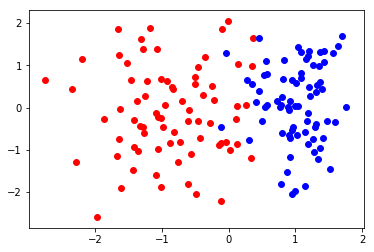

In [7]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X = np.load('Ex2_HW2_X.npy') 
Y = np.load('Ex2_HW2_t.npy') 

XEx2_Class1 = X[Y==0,:]
XEx2_Class2 = X[Y==1,:]

plt.scatter(XEx2_Class1[:, 0], XEx2_Class1[:, 1], marker='o', c='r',
            s=35)
plt.scatter(XEx2_Class2[:, 0], XEx2_Class2[:, 1], marker='o', c='b',
            s=35)

plt.show()
